## Poznajemy możliwości MLPClassifier z sklearn.neural_network
Zapoznaj się z **całością**:
1. źródeł funkcji aktywacji: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/neural_network/_base.py
2. dokumentacji API &ndash; metody i parametry: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
3. opisu działania: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

## Tworzymy malutki zbiór danych i prostą sieć

layer weight matrix shapes: [(2, 4), (4, 4), (4, 1)]
detected layer sizes: [2, 4, 4, 1]


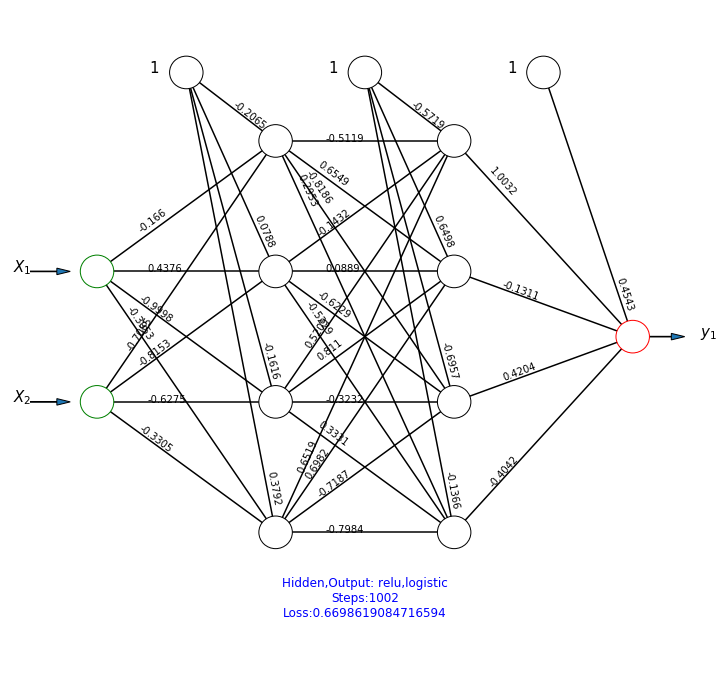

In [2]:
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
X = [[0,0],[0,1],[1,0],[1,1],[0.8,0.6]] #pięć dwu-atrybutowych przykładów
y = [0, 1, 1, 1, 0] #...i ich liczbowe "klasy decyzyjne"
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(4,4), random_state=1, 
                    max_iter=10000, n_iter_no_change=1000)
clf.fit(X, y) #tu zachodzi uczenie
draw_nn(clf) #obejrzyj źródła tej funkcji, możesz ją ulepszyć!

## Rysujemy rzut z góry na wyjście próbkując wartości wejść

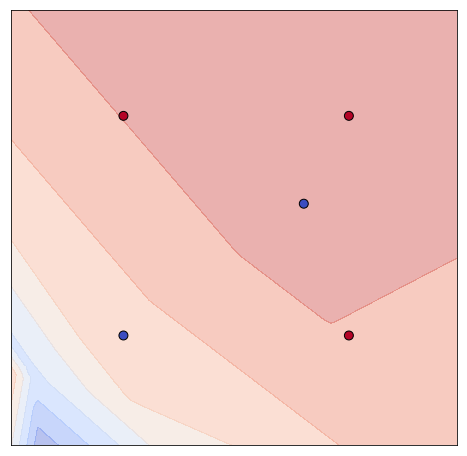

In [3]:
from NN_helpers import draw_response
draw_response(clf,X,y) #obejrzyj i przeanalizuj źródło tej funkcji!

## ...a teraz zamiast rzutu z góry, pełen widok 3D

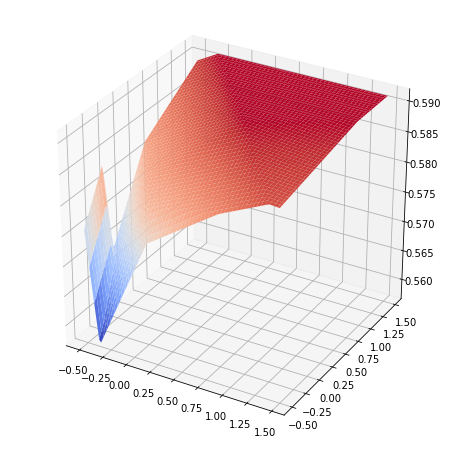

In [4]:
from NN_helpers import draw_response3D
draw_response3D(clf,X,y) #obejrzyj i przeanalizuj źródło tej funkcji!
#możesz ją ulepszyć, żeby rysowała kropki w 3D tak jak poprzednia rysuje je w 2D

## Mini-zadanie programistyczne
Na podstawie funkcji ``draw_response3D(clf,X,y)`` napisz podobną funkcję ``draw_output3D()``, która jako argument dostaje sieć neuronową, numer warstwy, numer neuronu w tej warstwie, i dwa numery wejść. Funkcja ta ma &ndash; analogicznie do ``draw_response3D()`` &ndash; wykreślać, jak zmienia się wyjście wybranego neuronu w funkcji jego dwóch wybranych wejść.

## Tak dowiadujemy się o macierze wag pomiędzy warstwami (rozmiary i, jeśli trzeba, wartości):

In [5]:
[coef.shape for coef in clf.coefs_]

[(2, 4), (4, 4), (4, 1)]

## Jeśli chcemy mieć kontrolę nad pojedynczymi krokami uczenia i chcemy sami je kontynuować, używamy ``warm_start``

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	accuracy 0.4 	loss 0.8268182609714202
iter 50 	accuracy 0.6 	loss 0.7237687199253379
iter 100 	accuracy 0.6 	loss 0.6985827232305021
iter 150 	accuracy 0.6 	loss 0.6825289510448932
iter 200 	accuracy 0.8 	loss 0.6731609921588257
iter 250 	accuracy 0.8 	loss 0.663702404802986
iter 300 	accuracy 0.8 	loss 0.6537733754301756
iter 350 	accuracy 0.8 	loss 0.6424541578600267
iter 400 	accuracy 0.8 	loss 0.630893097444644
iter 450 	accuracy 0.8 	loss 0.6180300971007582
iter 500 	accuracy 0.8 	loss 0.6039284157569674
iter 550 	accuracy 0.8 	loss 0.5889620442214822
iter 600 	accuracy 0.8 	loss 0.5736347497816042
iter 650 	accuracy 0.8 	loss 0.5586407637804659
iter 700 	accuracy 0.8 	loss 0.5444767670304498
iter 750 	accuracy 0.8 	loss 0.5313555942316701
iter 800 	accuracy 0.8 	loss 0.5195807248683925
iter 850 	accuracy 0.8 	loss 0.5092289123995871
iter 900 	accuracy 0.8 	loss 0.5002687268207907
iter 950 	accuracy 0.8 	loss 0.49261473970637937
iter 1000 	accuracy 0.8 	loss 0.486167714730

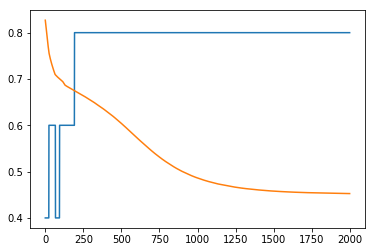

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(10,2), random_state=1, max_iter=1, warm_start=True)
licz=[] #gromadzimy na potrzeby wykresu te trzy parametry
accu=[]
loss=[]
for i in range(2000):
    clf.fit(X, y)
    licz.append(i)
    accu.append(clf.score(X,y))
    loss.append(clf.loss_)
    if i%50==0: #wyświetlaj postęp obliczeń, co 50-ta epoka
        print("iter",i,"\taccuracy",clf.score(X,y),"\tloss",clf.loss_)
import matplotlib.pyplot as plt
plt.plot(licz,accu,loss)

## Przewidywanie klasy dla zadanych przykładów

In [16]:
clf.predict_proba([[2.0, 2.0], [-1.7, -2.0]])
#prawdopodobieństwa każdej klasy dla każdego przypadku (w wierszach sumują się do 1)

array([[2.58621534e-01, 7.41378466e-01],
       [1.00000000e+00, 6.07011770e-11]])

In [13]:
clf.predict([[2.0, 2.0], [-1.7, -2.0]]) #wybrane najbardziej prawdopodobne klasy

array([1, 0])

## Uczymy się znajomego zbioru irysków
Zwróć uwagę, że atrybut wyjściowy jest nominalny, stąd MLPClassifier automatycznie używa warstwy wyjściowej softmax. Więcej tutaj: https://stackoverflow.com/questions/47359784/how-scikit-learn-implements-the-output-layer

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
#...ktoś zapomniał o normalizacji?
for i in range(2,11):
    clf = MLPClassifier(hidden_layer_sizes=(4,i), random_state=1, max_iter=10000)
    clf.fit(iris.data, iris.target)
    draw_nn(clf)
    print("accuracy on learning set:",clf.score(iris.data, iris.target))

2
3
4
5
6
7
8
9


## Normalizacja i podział na zbiór uczący i testujący

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X, y = some_dataset
X = StandardScaler().fit_transform(X) #ważne jeśli używamy NN!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
#podanie random_state pozwala na uzyskanie determinizmu ("seed")

#...ale powyższy przykład najpierw skaluje całość danych, a potem dzieli je na testujące i uczące.
#Tak nie wolno robić, bo wiedza z części uczącej "przecieka" do testującej.
#Bardziej prawidłowo: najpierw podzielić zbiór na część uczącą i testującą, a potem:
scaler = StandardScaler()  
scaler.fit(X_train) #naucz się parametrów normalizacji tylko na uczącym
X_train = scaler.transform(X_train) #normalizacja uczącego
X_test = scaler.transform(X_test) #...i tymi samymi parametrami normalizacja testującego

## Inne gotowe zbiory danych, PIMA, BUPA
Przydadzą się nam jeszcze ``load_diabetes()`` (a.k.a. "PIMA") i ewentualnie ``load_breast_cancer()``.

Zobacz https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

...a także do bardziej "ręcznego" załadowania &ndash; zbiór "BUPA", 
https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data
z kolumnami ['mcv','alkphos','sgpt','sgot','gammagt','drinks','selector'].